<a href="https://colab.research.google.com/github/PosgradoMNA/Equipo-7-Posada-Roca-Guia-/blob/main/Actividad_Semanal_4_V1_Equipo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

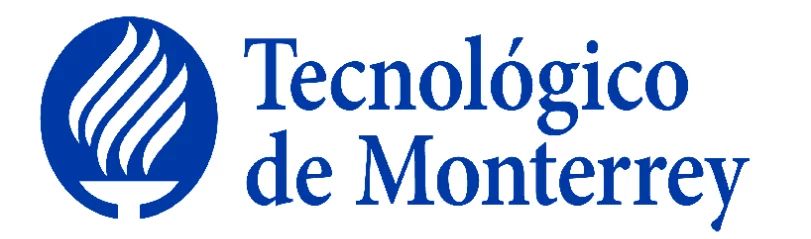
#**Semana 4 - Actividad 1**

##Rigoberto Vega Escudero, A01793132

##Carlos Enriquez Gorgonio - A01793102

##Materia: Ciencia De Datos

##Profesor:Jobish Vallikavungal

##10/Octubre/2022

##**Objetivo**

Realizar la reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

#**Selección y limpieza de los Datos en Python**

Aquí usaremos técnicas de limpieza como en la actividad pasada para abordar los temas de normalización.

In [ ]:
#Como base del ejercicio, se procede a cargar las librerias que se utilizaran
import pandas as pd
import numpy as np
import statistics as sts
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
#Para el desarollo de esta actividad se utilizara la fuente de información proporcionada por el profesor
#El dataframe df contiene los datos del archivo "default of credit card clients.csv"
df = pd.read_csv('/content/default of credit card clients.csv', index_col=0)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
#En nuestra primer etapa de validación de información, decidimos primero ubicar las columnas con elementos vacios
df.isnull().any()

X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [ ]:
#Despues de identificar las columnas en el dataframe que tienen columnas sin información, se procede con la limpieza
#Creamos una nueva copia del DataFrame para evitar trabajar con la fuente original
#El DataFrame df2, contiene una copia del dataframe df
df1 = df.copy()
#Para facilitar el analisis, se tomó la decisión de elegir las columnas principales que nos ayudaran a identificar la información y se renombran para su identificación simple
df1.rename(columns = {'X1' : 'Amount_credit', 'X5': 'Age_year'}, inplace = True)
df1

,Amount_credit,X2,X3,X4,Age_year,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [ ]:
# Despues de analizar el contenido, tambien se decidió elminar las columnas que no contien información relevante para nuestro analisis
#Se eliminan 16 columnas las cuales son:  'X2','X3','X4','X6','X7','X8','X9','X10','X11','Y' que son variables categóricas
df2 = df1.drop(['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis = 1)
df2

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


In [ ]:
#Como parte de analisis, creamos un nuevo DataFrame llamado Mean, el cual contendrá los valores promedio de cada columna
#Definimos la variable name, que contiene los nombres de las columnas del DataFrame df2
name = df2.columns
print(name)
Mean = []
#utilizamos un ciclo par recorrer las columnas 
for n in name:
  Mean.append(df2[n].mean()) #using Append to save these values in a list
print(Mean)

Index(['Amount_credit', 'Age_year', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23'],
      dtype='object')
[167484.32266666667, 35.484214035672615, 51236.86274967488, 49190.73466937877, 47025.35015173242, 43275.65232616308, 40324.49397992196, 38881.135745248415, 5662.945885569485, 5922.488913340669, 5225.623399573219, 4827.252525926173, 4800.2972089766245, 5216.259976662777]


In [ ]:
#Se procede a llenar los espacios vacios dentro de las columnas, con los valores promedios previamente obtenidos para cada columna
name = df2.columns
#Se utiliza un ciclo, para recorrer cada columna e ir llenando los valores vacios
for n in range(0,len(name)):
  j=name[n]
  df2[j].fillna(value = Mean[n], inplace = True)
  
df2

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29997,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29998,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0


#**Parte 1: Ejercicio guiado**

#Normalization

Para utilizar la normalizacion
re-escala la informacion a valores entre 0 y 1.

Formula: 

$$ x_i^{new} = \cfrac{x_i^{old} - x_{min}}{x_{max} - x_{min}}$$ 

La formula se define como (valor del arreglo en turno - valor minimo del arreglo) / rango, donde el rango equivale al valor maximo del arreglo - el valor minimo del arreglo, en formula es equivalente a:  (a - min) / range, donde a representa el valor recorriendo el arreglo.

In [ ]:
#Creamos una funcion normaliza para normalizar con metodo max-min
#La función se alimenta de 1 parameto, x como un arreglo de valores
def normalize(x):
    min = np.min(x)
    max = np.max(x)
    range = max - min
#Creamos un ciclo for para recorrer los valores de nuestro arreglo con valores a normalizar y comprimimos la formula en esa misma linea
    return [(a - min) / range for a in x]

Para utilizar la normalizaciónn desde [0, 1] a cualquier rango

$$x_i^{new}=x_i^{old}\cdot\left(rango_{nuevo}\right)+ LimiteInferior_{nueva} $$


La fórmula se define como la multiplicación de cualquier elemento del arreglo entrante, multiplicado por el rango que resulta de la reta entre el limite superior, menos el limite inferior. Todo eso sumado al limite inferior. Con fórmula [a * range + nLoBound, donde a representa cada valor dentro de un arreglo, y rango es la la resta del limite inferior al limte superior nUpBound - nLoBound

In [ ]:
# Creamos la función normalizeanyrange para normalizar de [0, 1] a cualquier rango
#La función se alimenta de 3 valores, 1 arreglo de valores normalizedX, un valor de limite inferior nLoBound y un valor de limite superior nUpBound
def normalizeanyrange(normalizedX, nLoBound, nUpBound):
    range = nUpBound - nLoBound
    return [a * range + nLoBound for a in normalizedX]

Para utilizar la normalización de un rango a otro


$$x_i^{new}=\left(\frac{x_{i^{}}^{old}-\min\left(A\right)}{\max\left(A\right)-\min\left(A\right)}\right)\cdot\left(rango_{nuevo}\right)+LimiteInferior_{nueva}$$

La fórmula se define como la resta del valor en el arreglo menos el valor minimo del arreglo, dividido entre el rango, que es la resta del valor maximo del arreglo menos el valor minimo del arrego. Esto mas la suma del rango de limites más el limite inferior, donde el rango de limites es la resta del limite superior menos el limite inferior.

((xi - min) / range) * nRange + nLoBound



In [ ]:
#Generamos la función normalizerangetorange, la cual contendrá la normalización de un rango a otro. 
#La función se integra de 3 argumentos, un arreglo X, un valor de rango inferior nLoBound y un valor de rango superior nUpBound
def normalizerangetorange(X, nLoBound, nUpBound):
    min = np.min(X)
    max = np.max(X)
    range = max - min
    nRange = nUpBound - nLoBound

    return [((xi - min) / range) * nRange + nLoBound for xi in X]

Normalización de puntuación Z (Estandarización) - convierte los datos del conjunto a tener una media de 0 y una desviacion estandar de 1 

 $$ x_i^{new} = \cfrac{x_i^{old} - \mu}{\sigma}$$ 

 La fórmula se define como  la resta entre el valor x en turno de nuestro arreglo menos el promedio de los valores del arreglo x, todo entre la desviación etandar del arreglo x. ((X-xm)/sd)

In [ ]:
#Definimos una función de estandarización o normalización.
LA
def standarization(X):
  xm = np.mean(X)
#El metodo statisctics.pstdev(), calcula la desviación estandar de un arreglo
  sd =sts.pstdev(X)
  return ((X-xm)/sd)

In [ ]:
#A continuación normalizamos  todas las columnas en el rango de 0-1, usando la función previamente definida normalize
#esta función re escala la información de valores entre 0 y 1
#Nuestro nuevo dataframe de valores normalizados se llama´ra df_2 normalizew
columnas = df2.columns
print(columnas)
df2_normalize = df2.copy()
for n in columnas:
  df2_normalize[n] = normalize(df2[n])
df2_normalize

Index(['Amount_credit', 'Age_year', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23'],
      dtype='object')


,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
2,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
3,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
4,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
5,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.212121,0.310345,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29997,0.141414,0.379310,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29998,0.020202,0.275862,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864


In [ ]:
#Utilizamos la función narmalizerange, previamente definida para normalizar variables a un rango de 10 a 20
#Para esto creamos el arreglo df_normlizerange, la cual contendra los nuevos valores noramalizados
#ingremos los paremetros de normalización como limites 0 y 10.
df2_normalizerange = df2_normalize.copy()
for n in columnas:
  df2_normalizerange[n] = normalizeanyrange(df2_normalizerange[n],0,10)
df2_normalizerange

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,0.101010,0.517241,1.499817,0.691643,0.867229,1.601378,0.806481,2.609787,0.000000,0.004091,0.000000,0.000000,0.000000,0.000000
2,1.111111,0.862069,1.488924,0.678575,0.878171,1.632199,0.840740,2.634847,0.000000,0.005937,0.011160,0.016103,0.000000,0.037831
3,0.808081,2.241379,1.723923,0.795325,0.937891,1.736374,0.954700,2.729278,0.017377,0.008906,0.011160,0.016103,0.023445,0.094578
4,0.404040,2.758621,1.880999,1.119950,1.134075,1.868092,1.093629,2.836851,0.022895,0.011987,0.013392,0.017713,0.025063,0.018916
5,0.404040,6.206897,1.541442,0.716014,1.060195,1.798630,0.996326,2.756805,0.022895,0.217787,0.111602,0.144928,0.016154,0.012844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,2.121212,3.103448,3.137163,2.492076,2.007458,2.430364,1.116217,2.732591,0.097304,0.118747,0.055835,0.049066,0.117225,0.018916
29997,1.414141,3.793103,1.480084,0.679553,0.882673,1.685959,0.857943,2.609787,0.021029,0.020935,0.100420,0.002077,0.000000,0.000000
29998,0.202020,2.758621,1.496738,0.694054,0.878589,1.798046,1.010565,2.758542,0.000000,0.000000,0.245525,0.067633,0.046890,0.058638


In [ ]:
#Utilizamos la función  normalizerangetorange previamente definida para mover el rango de normalización previa de 10-20 a 100-200
#Los nuevos valores normalizados seran almacenados en u nuevo dataframe llamado df2_normalizerangetorange
df2_normalizerangetorange = df2_normalizerange.copy()
for n in columnas:
  df2_normalizerangetorange[n] = normalizerangetorange(df2_normalizerangetorange[n],100,200)
df2_normalizerangetorange

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,101.010101,105.172414,114.998173,106.916432,108.672289,116.013776,108.064809,126.097872,100.000000,100.040908,100.000000,100.000000,100.000000,100.000000
2,111.111111,108.620690,114.889243,106.785751,108.781713,116.321994,108.407395,126.348474,100.000000,100.059373,100.111602,100.161031,100.000000,100.378311
3,108.080808,122.413793,117.239231,107.953247,109.378907,117.363737,109.547003,127.292785,100.173773,100.089060,100.111602,100.161031,100.234451,100.945777
4,104.040404,127.586207,118.809990,111.199497,111.340745,118.680917,110.936287,128.368505,100.228950,100.119875,100.133923,100.177134,100.250628,100.189155
5,104.040404,162.068966,115.414422,107.160143,110.601954,117.986296,109.963262,127.568055,100.228950,102.177872,101.116022,101.449275,100.161536,100.128436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,121.212121,131.034483,131.371633,124.920756,120.074582,124.303636,111.162166,127.325906,100.973039,101.187466,100.558346,100.490660,101.172253,100.189155
29997,114.141414,137.931034,114.800843,106.795526,108.826735,116.859586,108.579432,126.097872,100.210291,100.209350,101.004196,100.020773,100.000000,100.000000
29998,102.020202,127.586207,114.967379,106.940538,108.785886,117.980456,110.105651,127.585423,100.000000,100.000000,102.455248,100.676329,100.468901,100.586382


In [ ]:
#Utilizamos la función standarization previamente definida para obtener la normalización z la normalizacion original
#Para esto creamos un nuevo dataframe llamado df2_estandar, el cual contendrá los nuevos valores estandarizados
df2_estandar = df2.copy()
for n in columnas:
  df2_estandar[n] = standarization(df2_estandar[n])
df2_estandar

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
ID,,,,,,,,,,,,,,
1,-1.136720,-1.245968,-0.642721,-0.647594,-0.668203,-0.672731,-0.663322,-0.652911,-0.341931,-0.227145,-0.296813,-0.308143,-0.314201,-0.293426
2,-0.365981,-1.028980,-0.659440,-0.666943,-0.639463,-0.621867,-0.606489,-0.598151,-0.341931,-0.213647,-0.240013,-0.244309,-0.314201,-0.180922
3,-0.597202,-0.161028,-0.298760,-0.494087,-0.482609,-0.449952,-0.417433,-0.391805,-0.250273,-0.191946,-0.240013,-0.244309,-0.248747,-0.012165
4,-0.905498,0.164454,-0.057678,-0.013457,0.032672,-0.232583,-0.186958,-0.156743,-0.221170,-0.169420,-0.228653,-0.237926,-0.244230,-0.237174
5,-0.905498,2.334333,-0.578834,-0.611511,-0.161373,-0.347213,-0.348378,-0.331654,-0.221170,1.334985,0.271182,0.266363,-0.269103,-0.255231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404759,0.381442,1.870300,2.018069,2.326634,0.695313,-0.149486,-0.384567,0.171302,0.610994,-0.012645,-0.113641,0.013071,-0.237174
29997,-0.134759,0.815417,-0.673007,-0.665495,-0.627638,-0.533150,-0.577948,-0.652911,-0.231012,-0.104013,0.214269,-0.299909,-0.314201,-0.293426
29998,-1.059646,0.164454,-0.647447,-0.644025,-0.638367,-0.348177,-0.324756,-0.327859,-0.341931,-0.257049,0.952777,-0.040040,-0.183292,-0.119044


#PCA



In [ ]:
#Primero observamos los valores de la media o promedio de cada una de las columnas de nuestro dataframe df2
#recordemos que df2 es la copia del dataframe original, que contiene unmicamente las columnas con las que trabajaremos
print('----------------------')
print('Media de cada variable')
print('----------------------')
df2.mean(axis=0)

----------------------
Media de cada variable
----------------------


Amount_credit    167484.322667
Age_year             35.484214
X12               51236.862750
X13               49190.734669
X14               47025.350152
X15               43275.652326
X16               40324.493980
X17               38881.135745
X18                5662.945886
X19                5922.488913
X20                5225.623400
X21                4827.252526
X22                4800.297209
X23                5216.259977
dtype: float64

In [ ]:
#Ahora observamos la varianza de cada columna de nuestro dataframe df2
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df2.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Amount_credit    1.683446e+10
Age_year         8.495781e+01
X12              5.421630e+09
X13              5.065216e+09
X14              4.808845e+09
X15              4.138273e+09
X16              3.695759e+09
X17              3.546367e+09
X18              2.742984e+08
X19              5.308748e+08
X20              3.099739e+08
X21              2.454198e+08
X22              2.334185e+08
X23              3.160348e+08
dtype: float64

Buscamos reducir este dataset de 14 variables en tan solo 2 y con ello ver cuales son nuestros componentes principales donde se aloja toda la varianza del conjunto total

In [ ]:
#Estandarizamos el dataset df2, para trabajar con datos de media = 0 y varianza = 1
df2_normalize = df2_estandar
df2_normalize.shape

(30000, 14)

In [ ]:
#Obtenemos la la correlacion de todos los datos de nuestro dataframe
df2_normalize.corr()

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Amount_credit,1.000000,0.144662,0.285457,0.278330,0.283255,0.293963,0.295510,0.290403,0.195268,0.178396,0.210101,0.203205,0.217124,0.219573
Age_year,0.144662,1.000000,0.056349,0.054349,0.053774,0.051431,0.049384,0.047698,0.025969,0.021791,0.029219,0.021354,0.022777,0.019507
X12,0.285457,0.056349,1.000000,0.951480,0.892266,0.860257,0.829763,0.802630,0.140271,0.099319,0.156903,0.158269,0.167031,0.179307
X13,0.278330,0.054349,0.951480,1.000000,0.928320,0.892470,0.859767,0.831577,0.280366,0.100817,0.150718,0.147368,0.157952,0.174219
X14,0.283255,0.053774,0.892266,0.928320,1.000000,0.923962,0.883894,0.853305,0.244348,0.316914,0.130022,0.143373,0.179713,0.182288
X15,0.293963,0.051431,0.860257,0.892470,0.923962,1.000000,0.940131,0.900918,0.233011,0.207529,0.300018,0.130154,0.160414,0.177591
X16,0.295510,0.049384,0.829763,0.859767,0.883894,0.940131,1.000000,0.946161,0.217053,0.181210,0.252299,0.293076,0.141555,0.164136
X17,0.290403,0.047698,0.802630,0.831577,0.853305,0.900918,0.946161,1.000000,0.199993,0.172633,0.233767,0.250210,0.307699,0.115451
X18,0.195268,0.025969,0.140271,0.280366,0.244348,0.233011,0.217053,0.199993,1.000000,0.285601,0.252206,0.199588,0.148469,0.185756
X19,0.178396,0.021791,0.099319,0.100817,0.316914,0.207529,0.181210,0.172633,0.285601,1.000000,0.244770,0.180096,0.180894,0.157617


In [ ]:
#Obtenemos los promedios de nuestro dataframe normalizado, redondenando sus valores decimales hasta 10 cifras
df2_normalize.mean().round(10)

Amount_credit   -0.0
Age_year        -0.0
X12             -0.0
X13             -0.0
X14             -0.0
X15             -0.0
X16              0.0
X17              0.0
X18              0.0
X19              0.0
X20             -0.0
X21              0.0
X22              0.0
X23             -0.0
dtype: float64

In [ ]:
#Obtenemos los valores de la desviación con el metodo std estandar de las columnas de nuestro dataset df2_normalize
df2_normalize.std().round(10)

Amount_credit    1.000017
Age_year         1.000017
X12              1.000017
X13              1.000017
X14              1.000017
X15              1.000017
X16              1.000017
X17              1.000017
X18              1.000017
X19              1.000017
X20              1.000017
X21              1.000017
X22              1.000017
X23              1.000017
dtype: float64

In [ ]:
#Generamos un nuevo dataset llamado varianza, el cual contendra la covarianza cov del data set previamente normalizado
#Considerando que el dataset se traspone con el .T, por lo que toma una forma mas simple de analisis en cuanto cantidad de columnas y filas
varianza = np.cov(df2_normalize.T)
varianza

array([[1.00003333, 0.14466728, 0.28546695, 0.27833975, 0.2832648 ,
        0.29397275, 0.29552029, 0.29041263, 0.19527462, 0.17840171,
        0.21010844, 0.20321169, 0.21713085, 0.2195805 ],
       [0.14466728, 1.00003333, 0.05635079, 0.05435072, 0.05377619,
        0.0514327 , 0.04938594, 0.04769952, 0.02596981, 0.02179149,
        0.02922022, 0.02135507, 0.02277775, 0.01950757],
       [0.28546695, 0.05635079, 1.00003333, 0.95151213, 0.892296  ,
        0.86028616, 0.82979044, 0.8026569 , 0.14027564, 0.09932261,
        0.15690838, 0.15827388, 0.16703702, 0.17931281],
       [0.27833975, 0.05435072, 0.95151213, 1.00003333, 0.92835144,
        0.89249933, 0.85979588, 0.83160471, 0.28037567, 0.1008199 ,
        0.15072295, 0.14737328, 0.15795719, 0.17422446],
       [0.2832648 , 0.05377619, 0.892296  , 0.92835144, 1.00003333,
        0.92399266, 0.88392367, 0.85333386, 0.24435638, 0.31692504,
        0.13002625, 0.14337816, 0.17971896, 0.18229387],
       [0.29397275, 0.0514327 , 0.8

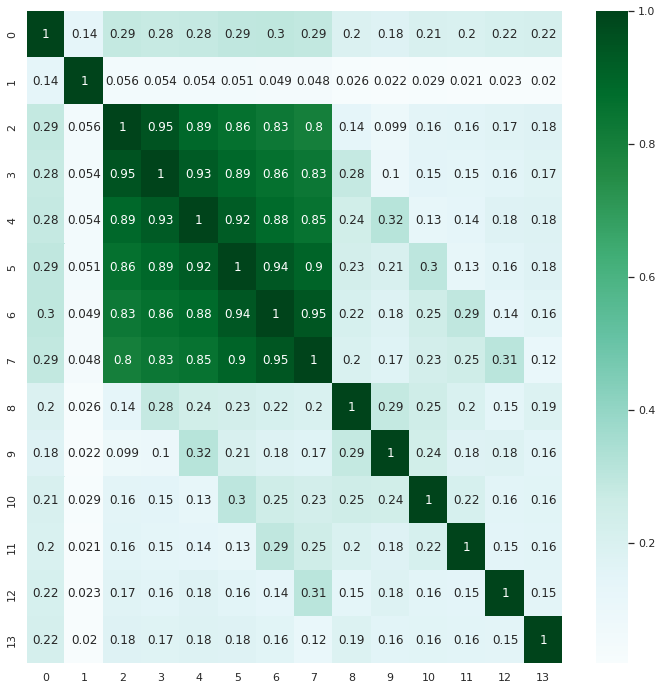

In [ ]:
#Generamos un Heatmap para la matriz de correlacion llamada varianza
sns.set(rc={'figure.figsize':(12,12)}) 
sns.heatmap(varianza, cmap = 'BuGn', annot=True)

In [ ]:
#Creamso un nuevo DataSet llamado variaza 2, el cual contiene la matriz de covarianza de los datos para con ello sacar la relacion de los valores, sin trasposición
varianza2 = df2_normalize.cov()
varianza2

,Amount_credit,Age_year,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
Amount_credit,1.000033,0.144667,0.285467,0.278340,0.283265,0.293973,0.295520,0.290413,0.195275,0.178402,0.210108,0.203212,0.217131,0.219580
Age_year,0.144667,1.000033,0.056351,0.054351,0.053776,0.051433,0.049386,0.047700,0.025970,0.021791,0.029220,0.021355,0.022778,0.019508
X12,0.285467,0.056351,1.000033,0.951512,0.892296,0.860286,0.829790,0.802657,0.140276,0.099323,0.156908,0.158274,0.167037,0.179313
X13,0.278340,0.054351,0.951512,1.000033,0.928351,0.892499,0.859796,0.831605,0.280376,0.100820,0.150723,0.147373,0.157957,0.174224
X14,0.283265,0.053776,0.892296,0.928351,1.000033,0.923993,0.883924,0.853334,0.244356,0.316925,0.130026,0.143378,0.179719,0.182294
X15,0.293973,0.051433,0.860286,0.892499,0.923993,1.000033,0.940162,0.900948,0.233019,0.207536,0.300028,0.130158,0.160419,0.177597
X16,0.295520,0.049386,0.829790,0.859796,0.883924,0.940162,1.000033,0.946192,0.217060,0.181216,0.252308,0.293085,0.141560,0.164142
X17,0.290413,0.047700,0.802657,0.831605,0.853334,0.900948,0.946192,1.000033,0.200000,0.172639,0.233775,0.250218,0.307710,0.115455
X18,0.195275,0.025970,0.140276,0.280376,0.244356,0.233019,0.217060,0.200000,1.000033,0.285610,0.252214,0.199595,0.148474,0.185762
X19,0.178402,0.021791,0.099323,0.100820,0.316925,0.207536,0.181216,0.172639,0.285610,1.000033,0.244778,0.180102,0.180900,0.157622


In [ ]:
#Obtenemos la varianza total o la suma de las varianzas de los valores de nuestro dataset df2_normalize, se estima que debe igual a 14, equivalente al total de las variables
df2_normalize.var().sum()

14.000466682222738

In [ ]:
#Creamos un nuevo DataSet llamdo T, que contendra la varianza total, anteriormente descrita
#sacamos la varianza de cada conjunto de datos
#considerar que se esta utlizando el DataSet varianza = np.cov(df2_normalize.T), previamente definido.
t= df2_normalize.var().sum()
varCredit = varianza[0][0]
varAge = varianza[1][1]
varX12 = varianza[2][2]
varX13 = varianza[3][3]
varX14 = varianza[4][4]
varX15 = varianza[5][5]
varX16 = varianza[6][6]
varX17 = varianza[7][7]
varX18 = varianza[8][8]
varX19 = varianza[9][9]
varX20 = varianza[10][10]
varX21 = varianza[11][11]
varX22 = varianza[12][12]
varX23 = varianza[13][13]



In [ ]:
#Vemos que su porcentaje este igualmente distribuido.
print('Total Varience \t\t\t:', t.round(5) )

print('Varience prop. of Amount of the given credit \t:', ((varCredit/t)*100).round(5),'%' )
print('Varience prop. of Age (year) \t:', ((varAge/t)*100).round(5),'%' )
print('Varience prop. of x14 \t:', ((varX12/t)*100).round(5),'%' )
print('Varience prop. of x15 \t:', ((varX13/t)*100).round(5),'%' )
print('Varience prop. of x16 \t:', ((varX14/t)*100).round(5),'%' )
print('Varience prop. of x15 \t:', ((varX15/t)*100).round(5),'%' )
print('Varience prop. of x16 \t:', ((varX16/t)*100).round(5),'%' )
print('Varience prop. of x17 \t:', ((varX17/t)*100).round(5),'%' )
print('Varience prop. of x18 \t:', ((varX18/t)*100).round(5),'%' )
print('Varience prop. of x19 \t:', ((varX19/t)*100).round(5),'%' )
print('Varience prop. of x20 \t:', ((varX20/t)*100).round(5),'%' )
print('Varience prop. of x21 \t:', ((varX21/t)*100).round(5),'%' )
print('Varience prop. of x22 \t:', ((varX22/t)*100).round(5),'%' )
print('Varience prop. of x23 \t:', ((varX23/t)*100).round(5),'%' )

Total Varience 			: 14.00047
Varience prop. of Amount of the given credit 	: 7.14286 %
Varience prop. of Age (year) 	: 7.14286 %
Varience prop. of x14 	: 7.14286 %
Varience prop. of x15 	: 7.14286 %
Varience prop. of x16 	: 7.14286 %
Varience prop. of x15 	: 7.14286 %
Varience prop. of x16 	: 7.14286 %
Varience prop. of x17 	: 7.14286 %
Varience prop. of x18 	: 7.14286 %
Varience prop. of x19 	: 7.14286 %
Varience prop. of x20 	: 7.14286 %
Varience prop. of x21 	: 7.14286 %
Varience prop. of x22 	: 7.14286 %
Varience prop. of x23 	: 7.14286 %


In [ ]:
print(np.sqrt(np.std(df2_normalize['Amount_credit'])))

1.0


In [ ]:
#Aqui correremos un PCA, para de 14 conjuntos en el dataset, buscaremos disminuirlo a dos para obtener sus conjuntos principales
pcs = PCA(n_components=2)

pcs.fit(df2_normalize)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary


,Standard deviation,Proportion of variance,Cumulative proportion
0,2.432941,0.422786,0.422786
1,1.310044,0.122583,0.545369


In [ ]:
#Volteamos la matriz
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1
Standard deviation,2.43,1.31
Proportion of variance,0.42,0.12
Cumulative proportion,0.42,0.55


In [ ]:
#Le asignamos la etiqueta correcta
pcsSummary.columns = ['PC1','PC2']
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2
Standard deviation,2.4329,1.3100
Proportion of variance,0.4228,0.1226
Cumulative proportion,0.4228,0.5454


Aquí podemos notar que tenemos dos pesos que representan solo el 54% total de la varianza, es por ende que podemos tener una perdida de informacion importante con este PCR. Entonces 

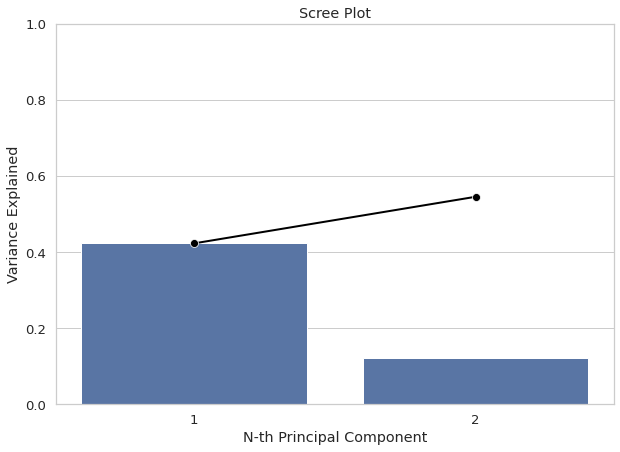

In [ ]:
#sacamos el total de la data set en solo dos vectores de valor propio
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [ ]:
pcs.components_.round(4)

array([[ 0.1655,  0.0327,  0.3724,  0.3832,  0.3883,  0.3916,  0.3885,
         0.3807,  0.1352,  0.1168,  0.1281,  0.1169,  0.1138,  0.1055],
       [ 0.3008,  0.072 , -0.1908, -0.1746, -0.1269, -0.1204, -0.106 ,
        -0.0942,  0.3833,  0.4083,  0.3922,  0.3495,  0.304 ,  0.3235]])

In [ ]:
#Valores de acuerdo a la varianza del dataset.
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=['PC1','PC2'],
                                                                )
pcsComponents_df

,PC1,PC2
0,0.165466,0.300840
1,0.032742,0.071966
2,0.372429,-0.190839
3,0.383249,-0.174640
4,0.388259,-0.126916
5,0.391552,-0.120428
6,0.388497,-0.105966
7,0.380661,-0.094222
8,0.135171,0.383270
9,0.116794,0.408284


In [ ]:
#Valores obtenidos de la reduccion del dataset.
scores = pd.DataFrame(pcs.transform(df2_normalize),
                      columns=['PC1','PC2'],
                      index   = df2_normalize.index
                      )
scores.head(14)

,PC1,PC2
ID,,
1,-1.959037,-0.536616
2,-1.735857,-0.217023
3,-1.224738,-0.284749
4,-0.541374,-0.666535
5,-0.849181,0.738680
6,-0.537372,-0.711902
7,15.881180,-0.960741
8,-1.802774,-0.291932
9,-1.410233,-0.208563


In [ ]:
#Haremos el analisis PCA de todo el data set.
pcs = PCA()
pcs.fit(df2_normalize.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard deviation,2.432941,1.310044,1.022324,0.961743,0.940033,0.934185,0.882931,0.852417,0.840979,0.514244,0.266515,0.202680,0.159262,0.152457
Proportion of variance,0.422786,0.122583,0.074651,0.066066,0.063117,0.062334,0.055681,0.051899,0.050516,0.018888,0.005073,0.002934,0.001812,0.001660
Cumulative proportion,0.422786,0.545369,0.620020,0.686085,0.749202,0.811536,0.867217,0.919116,0.969632,0.988521,0.993594,0.996528,0.998340,1.000000


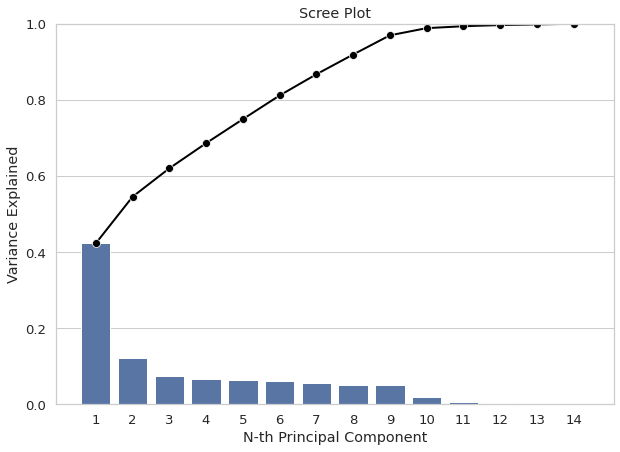

In [ ]:
#Aquí haremos un análisis de los componentes mínimos necesarios para no perder tanta información
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Podemos notar claramente que un mínimo de 2 valores no erá lo suficiente para cubrir un buen porcentaje de la varianza, aquí podemos notar que requerimos al menos 8.

In [ ]:
#Sacamos la suma delas barras para saber el minimo de variables 
((pcsSummary_df.iloc[2][7])*100).round(0)
#type(pcsSummary_df)

92.0

In [ ]:
#Sacamos la suma de las lineas para saber el minimo de variables 

((pcsSummary_df.iloc[2][7])*100).round(2)

91.91

In [ ]:
#Sacamos valores estadisticos de los pesos.
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3100,1.0223,0.9617,0.9400,0.9342,0.8829,0.8524,0.8410,0.5142,0.2665,0.2027,0.1593,0.1525
Proportion of variance,0.4228,0.1226,0.0747,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5454,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


In [ ]:
#sacamos varianzas de acuerdo a los pesos

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df2_normalize.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Amount_credit,0.165466,0.300840,-0.378685,-0.200217,0.034722,-0.078275,0.111060,-0.048351,-0.821874,-0.029156,-0.006204,0.015684,-0.000424,0.003337
Age_year,0.032742,0.071966,-0.869558,0.338508,-0.039014,0.071222,-0.078665,0.028216,0.330705,-0.009091,0.000098,-0.001311,0.000177,0.001081
X12,0.372429,-0.190839,-0.034308,-0.063997,0.041154,-0.044069,0.008156,0.009438,0.010307,0.566738,0.415914,-0.433032,-0.183793,-0.316598
X13,0.383249,-0.174640,-0.001881,0.007366,0.083060,-0.029011,-0.032348,-0.135672,0.017206,0.386836,0.038421,0.344844,0.329332,0.645429
X14,0.388259,-0.126916,0.034704,0.060455,0.114161,0.098801,-0.121322,0.092855,-0.018786,0.122859,-0.484518,0.495979,-0.085736,-0.527827
X15,0.391552,-0.120428,0.034018,0.074805,0.028592,0.014391,0.126411,0.039206,0.018955,-0.205246,-0.523297,-0.489005,-0.363050,0.345880
X16,0.388497,-0.105966,0.033847,0.039665,-0.106935,-0.099031,-0.007584,0.049718,0.023455,-0.420018,0.067992,-0.250312,0.718333,-0.226060
X17,0.380661,-0.094222,0.018529,-0.070282,-0.164903,0.069737,0.007982,0.000058,0.058644,-0.488859,0.513623,0.338906,-0.427269,0.071898
X18,0.135171,0.383270,0.173506,0.361335,0.226156,0.039905,-0.201113,-0.749029,0.022183,-0.056548,0.047611,-0.069329,-0.044885,-0.084604
X19,0.116794,0.408284,0.200849,0.346307,0.150531,0.407273,-0.279619,0.577950,-0.111902,0.050833,0.147235,-0.068926,0.038819,0.124934


Depues de ver el analisis podemos denotar que para el primer componente esta midiendo los  Amount of bill statement (NT dollar). Para el segundo peso la edad es el principal componente a medir. 

##**Paso 3: Identifique valores atípicos**

['Amount_credit', 'Age_year', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
Amount_credit


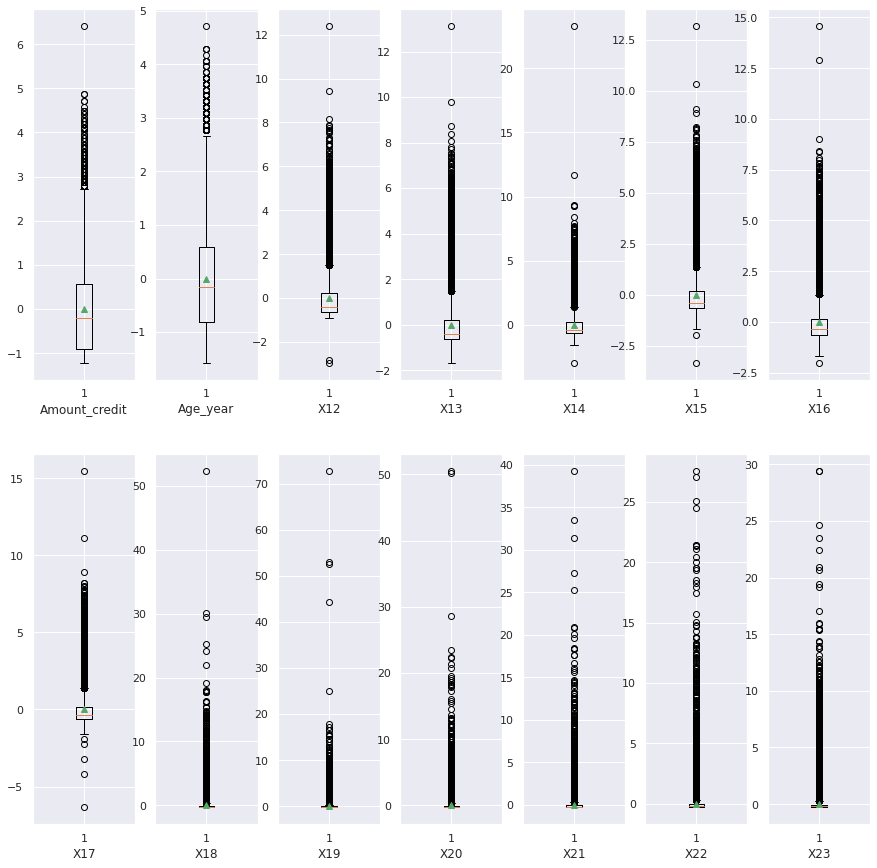

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
nombres = ['Amount_credit', 'Age_year', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17','X18', 'X19', 'X20', 'X21',
       'X22', 'X23']
print(nombres)
fig, axes = plt.subplots(2, 7)
k=0
print(nombres[0])
for name in nombres:
  plt.subplot(2,7,k+1) 
  plt.boxplot(df2_normalize[name], showmeans=True)
  plt.xlabel(name)
  k+=1

plt.show()

Podemos ver bastantes valores fuera de nuestro bloxpot que son fieles indicadores de outliers que pueden provocar sesgos en nuestro análisis estadístico. Creemos que tambien estos outliers pueden afectar al comportamiento general del PCA, esto nos dice que no pudimos concentrar toda la información en solo 2 variables.

#**Parte 2: Responde las siguientes preguntas en una celda de texto en Jupyter Notebook**

##1. ¿Cuál es el número de componentes mínimo y por qué?

Cuando hicimos el analisis con solo dos componentes minimos solo pudimos tomar un 56% del total de la varianza, entonces al hacer el analisis al total del dataset, pudimos analizar que con 8 componentes minimos podemos tener un minimo del 92% de los datos.

##2. ¿Cuál es la variación de los datos que representan esos componentes?

Estas son las variaciones en los principales pesos.




In [ ]:
pcsComponents_df.iloc[:14,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Amount_credit,0.165466,0.300840,-0.378685,-0.200217,0.034722,-0.078275,0.111060,-0.048351
Age_year,0.032742,0.071966,-0.869558,0.338508,-0.039014,0.071222,-0.078665,0.028216
X12,0.372429,-0.190839,-0.034308,-0.063997,0.041154,-0.044069,0.008156,0.009438
X13,0.383249,-0.174640,-0.001881,0.007366,0.083060,-0.029011,-0.032348,-0.135672
X14,0.388259,-0.126916,0.034704,0.060455,0.114161,0.098801,-0.121322,0.092855
X15,0.391552,-0.120428,0.034018,0.074805,0.028592,0.014391,0.126411,0.039206
X16,0.388497,-0.105966,0.033847,0.039665,-0.106935,-0.099031,-0.007584,0.049718
X17,0.380661,-0.094222,0.018529,-0.070282,-0.164903,0.069737,0.007982,0.000058
X18,0.135171,0.383270,0.173506,0.361335,0.226156,0.039905,-0.201113,-0.749029
X19,0.116794,0.408284,0.200849,0.346307,0.150531,0.407273,-0.279619,0.577950


##3. ¿Cuál es la pérdida de información después de realizar PCA?

Según la interpretación de nuestros resultados, al tomar solo estas 8 componentes minmos del PCA, solo perderiamos solo un 8% del total de los datos.



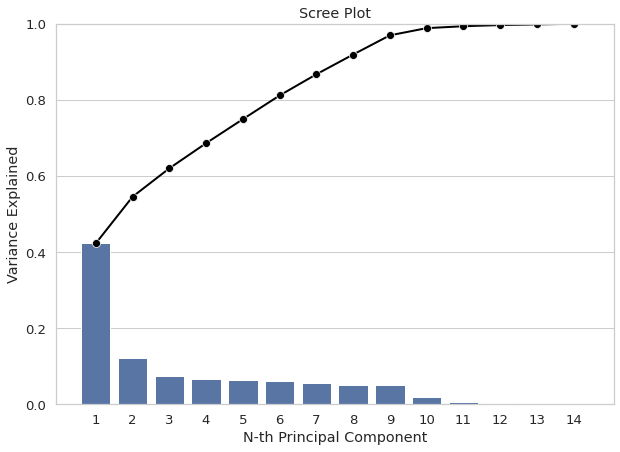

In [ ]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

##4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

Tomando en cuenta que estamos usando el dataset limpio y que se redujo todo a solo 8 columnas de datos, valores que representan mayores pesos en estas varianzas de acuerdo a la tabla son principales pesos serian las siguientes:



In [ ]:
names = pcsComponents_df.columns
x = 1
for n in names:
 print(f"Variable con mas peso en PC{x}:", pcsComponents_df[n].idxmax(axis=0, skipna=False))
 x+=1


Variable con mas peso en PC1: X15
Variable con mas peso en PC2: X19
Variable con mas peso en PC3: X19
Variable con mas peso en PC4: X18
Variable con mas peso en PC5: X23
Variable con mas peso en PC6: X22
Variable con mas peso en PC7: X20
Variable con mas peso en PC8: X19
Variable con mas peso en PC9: Age_year
Variable con mas peso en PC10: X12
Variable con mas peso en PC11: X17
Variable con mas peso en PC12: X14
Variable con mas peso en PC13: X16
Variable con mas peso en PC14: X13


##5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning? 

Creemos que el PCA es una herramienta muy efectiva para los procesos de Machine Learning ya que podemos hacer modelos más eficientes a partir de menos datos. A que me refiero, es bien sabido que toda técnica de ML funciona mejor a más datos, pero cuando tenemos datos no redundantes o que no aportan en sentidos estadísticos pesos sobre el análisis a realizar es mejor descartarlos para primero, tener un modelo eficiente y preciso y después, no tener ruidos innecesarios a futuro por datos que no ayudaran al desempeño futuro del mismo.
Ademas que con datos más consendados podemos obtener variables de regresion con mejor precisión.

##Referencias:

- geeksforgeeks. (05 de 12 de 2021). Data Reduction in Data Mining. Obtenido de https://www.geeksforgeeks.org/data-reduction-in-data-mining/
- Rodrigo, J. A. (12 de 2020). PCA con Python. Obtenido de https://www.cienciadedatos.net/documentos/py19-pca-python.html
- Santos, P. R. (13 de 06 de 2018). https://empresas.blogthinkbig.com/python-para-todos-tutorial-de-pca-en-5/#:~:text=Los%205%20pasos%20del%20proceso%20PCA.&text=Normalizarlos,nuevo%20espacio%20de%20dimensi%C3%B3n%20%3C%204. Obtenido de https://empresas.blogthinkbig.com/python-para-todos-tutorial-de-pca-en-5/#:~:text=Los%205%20pasos%20del%20proceso%20PCA.&text=Normalizarlos,nuevo%20espacio%20de%20dimensi%C3%B3n%20%3C%204


